In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.interpolate import griddata

mpl.font_manager.fontManager.addfont('/opt/localdata/Data/bea/nlp/bmi550/assignment2/Tinos-Regular.ttf')
mpl.rc('font', family='Tinos')

In [3]:
os.listdir("./")

['LogReg_opt_0.json',
 'RFC_opt_0.json',
 'SVC_opt_0.json',
 'SGD_opt_0.json',
 '.ipynb_checkpoints',
 'log_vis.ipynb',
 'RFC_opt_1.json',
 'SVC_opt_1.json',
 'LogReg_opt_1.json',
 'SGD_opt_1.json',
 'voting_ensemble_opt_1.json']

In [4]:
lr_res_df = pd.read_json("LogReg_opt_1.json", lines=True)
lr_res_df

,params,accuracy,micro_avg_f1,macro_avg_f1,final
0,"{'C': 7777.024328035791, 'l1_ratio': 0.2380661...",0.812709,0.792592,0.792519,False
1,"{'C': 9657.4920146808, 'l1_ratio': 0.971655911...",0.832776,0.820143,0.821078,False
2,"{'C': 6090.425018570317, 'l1_ratio': 0.7749754...",0.822742,0.805860,0.805730,False
3,"{'C': 7220.182573151242, 'l1_ratio': 0.0359664...",0.836120,0.820512,0.821024,False
4,"{'C': 585.1258603082556, 'l1_ratio': 0.8563468...",0.846154,0.834532,0.835245,False
...,...,...,...,...,...
146,"{'C': 113.96789242203705, 'l1_ratio': 0.050846...",0.859532,0.848920,0.846358,False
147,"{'C': 6794.190933803749, 'l1_ratio': 0.0613494...",0.799331,0.776119,0.778879,False
148,"{'C': 7222.119311188054, 'l1_ratio': 0.3745087...",0.812709,0.792592,0.792519,False
149,"{'C': 2028.8087352587247, 'l1_ratio': 0.869816...",0.802676,0.777358,0.774320,False


In [5]:
lr_res_df.loc[lr_res_df.final == True, :].reset_index()['params'][0]

{'C': 95.34740492076249, 'l1_ratio': 0.34681920586406, 'penalty': 'l2'}

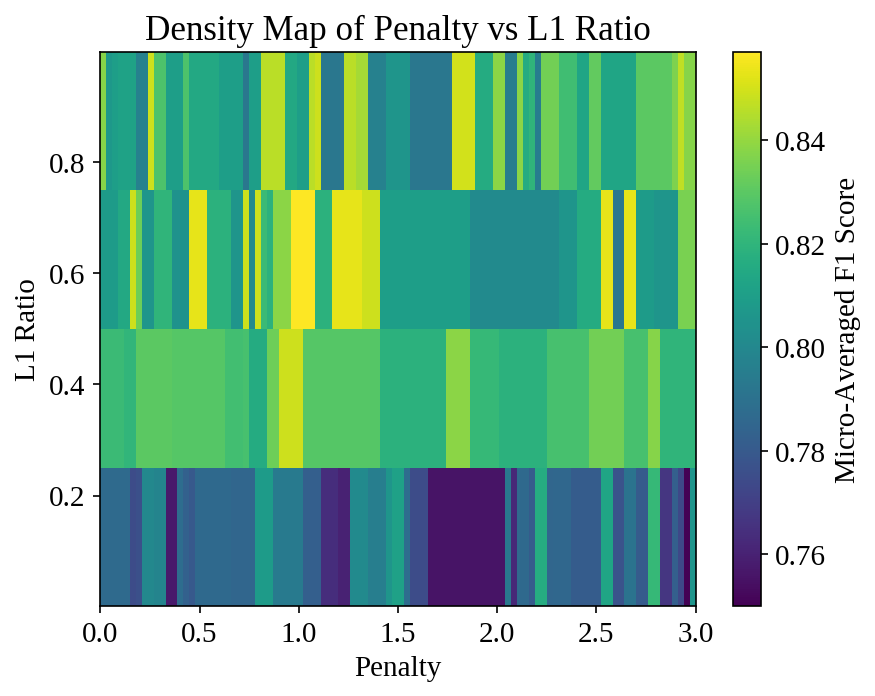

In [62]:
visualize_v2('penalty', 'l1_ratio', 'micro_avg_f1', lr_res_df[lr_res_df.final == False], method='nearest')

In [6]:
rfc_res_df = pd.read_json("RFC_opt_1.json", lines=True)
rfc_res_df

,params,accuracy,micro_avg_f1,macro_avg_f1,final
0,"{'max_depth': 50.21754945557685, 'n_estimators...",0.889632,0.887372,0.888559,False
1,"{'max_depth': 53.10526902500485, 'n_estimators...",0.903010,0.901023,0.902052,False
2,"{'max_depth': 62.30126906210339, 'n_estimators...",0.899666,0.897959,0.898337,False
3,"{'max_depth': 39.760632691199234, 'n_estimator...",0.903010,0.901023,0.902052,False
4,"{'max_depth': 41.78002737506229, 'n_estimators...",0.903010,0.901023,0.902052,False
...,...,...,...,...,...
146,"{'max_depth': 23.91828731692865, 'n_estimators...",0.892977,0.890410,0.891716,False
147,"{'max_depth': 64.0, 'n_estimators': 474.682035...",0.903010,0.901023,0.902052,False
148,"{'max_depth': 15.498562998182829, 'n_estimator...",0.903010,0.901694,0.902623,False
149,"{'max_depth': 63.7874693394345, 'n_estimators'...",0.903010,0.901023,0.902052,False


In [7]:
rfc_res_df.loc[rfc_res_df.final == True, :].reset_index()['params'][0]

{'max_depth': 25.518664071950102, 'n_estimators': 306.22402602953844}

In [8]:
svc_res_df = pd.read_json("SVC_opt_1.json", lines=True)
svc_res_df

,params,accuracy,micro_avg_f1,macro_avg_f1,final
0,"{'C': 77770.24328035791, 'gamma': 237.54884462...",0.518395,0.000000,0.000000,False
1,"{'C': 96574.920146808, 'gamma': 972.6013878937...",0.528428,0.305418,0.162073,False
2,"{'C': 60904.250185703175, 'gamma': 775.5287593...",0.518395,0.000000,0.000000,False
3,"{'C': 72201.82573151242, 'gamma': 35.046173736...",0.578595,0.258823,0.250708,False
4,"{'C': 5851.258603082556, 'gamma': 857.06237197...",0.528428,0.305418,0.162073,False
...,...,...,...,...,...
146,"{'C': 67218.06404914864, 'gamma': 332.66314198...",0.518395,0.000000,0.000000,False
147,"{'C': 8754.370722047437, 'gamma': 703.54767114...",0.518395,0.000000,0.000000,False
148,"{'C': 22228.19510858063, 'gamma': 985.66537251...",0.528428,0.305418,0.162073,False
149,"{'C': 27947.44746623278, 'gamma': 33.172691428...",0.518395,0.000000,0.000000,False


In [9]:
svc_res_df.loc[svc_res_df.final == True, :].reset_index()['params'][0]

{'C': 13818.16376424184, 'gamma': 8.268090668673615, 'kernel': 'rbf'}

In [10]:
sgd_res_df = pd.read_json("SGD_opt_1.json", lines=True)
sgd_res_df

,params,accuracy,micro_avg_f1,macro_avg_f1,final
0,"{'eta0': 0.007777246403327001, 'l1_ratio': 0.2...",0.712375,0.690647,0.699999,False
1,"{'eta0': 0.009657526231231001, 'l1_ratio': 0.9...",0.648829,0.623655,0.634849,False
2,"{'eta0': 0.006090815585150001, 'l1_ratio': 0.7...",0.678930,0.659574,0.666267,False
3,"{'eta0': 0.007220460276939001, 'l1_ratio': 0.0...",0.769231,0.745387,0.748124,False
4,"{'eta0': 0.000586066406328, 'l1_ratio': 0.8563...",0.682274,0.618473,0.620500,False
...,...,...,...,...,...
146,"{'eta0': 0.006722133896487001, 'l1_ratio': 0.3...",0.662207,0.648083,0.654940,False
147,"{'eta0': 0.0008763486161320001, 'l1_ratio': 0....",0.685619,0.624000,0.626453,False
148,"{'eta0': 0.0022235964512660003, 'l1_ratio': 0....",0.682274,0.618473,0.618143,False
149,"{'eta0': 0.0073069717199000005, 'l1_ratio': 0....",0.765886,0.740740,0.743575,False


In [12]:
sgd_res_df.loc[sgd_res_df.final == True, :].reset_index()['params'][0]

{'eta0': 0.00710094883474, 'l1_ratio': 0.9499692905608931, 'penalty': 'l2'}

In [56]:
n=4
var_list = [['a', 'b', 'c']]

len(set(var_list[-1]))*1j

3j

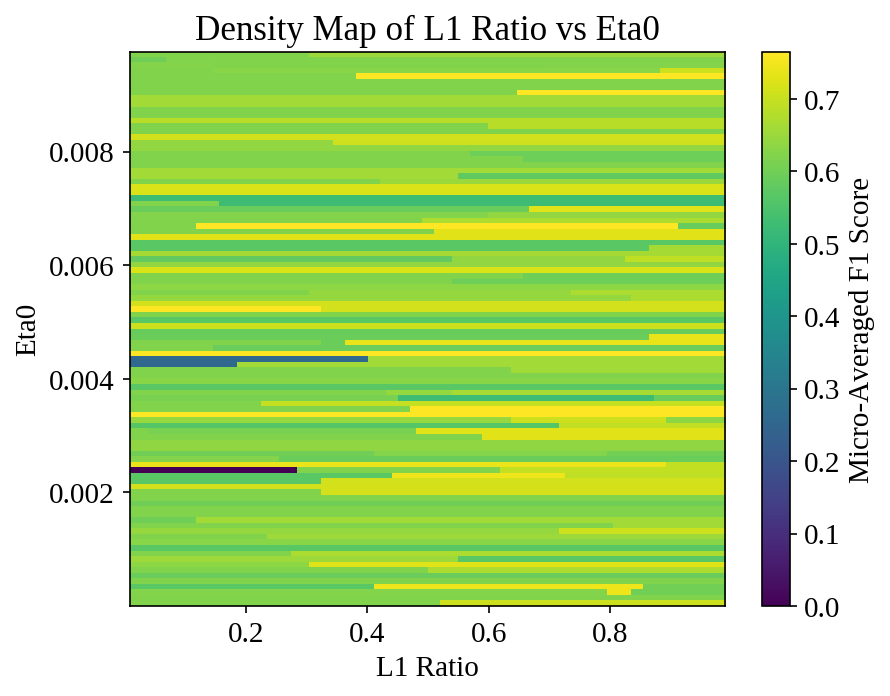

In [63]:
# NearestNDInterpolator, LinearNDInterpolator, CloughTocher2DInterpolator
plt.rcParams.update({'font.size': 14})

def convert_penalty(penalty_val):
    if penalty_val == 'none':
        return 1.0
    elif penalty_val == 'l1':
        return 2.0
    elif penalty_val == 'l2':
        return 3.0
    else:
        return 4.0

def visualize_v2(x_var: str, y_var: str, z_var: str, df, n: complex = 100j, method: str = 'cubic'):
    """
    method can be 'linear', 'cubic', or 'nearest'
    """
    var_list = []
    n_list = []
    for var_name in [x_var, y_var]:
        # if variable is 'penalty', convert it to categorical
        if var_name == 'penalty':
            var_list.append([convert_penalty(d[var_name]) for d in df['params']])
#             print(var_list)
            # set the n points for the mgrid function to the number of unique levels
            n_list.append(len(set(var_list[-1]))*1j)
        else:
            var_list.append([d[var_name] for d in df['params']])
            n_list.append(100j)
    
    # unpack var_list and n_list
    x_list, y_list = var_list
    x_n, y_n = n_list
    
    # create a grid to interpolate over
    grid_x, grid_y = np.mgrid[min(x_list):max(x_list):x_n, min(y_list):max(y_list):y_n]

    z_list = list(df[z_var])
#     print(z_list)
#     z_list = np.clip(z_list, 0.0, 1.0)

    # interpolate with griddata
    grid_z = griddata((x_list, y_list), z_list, (grid_x, grid_y), method=method, fill_value=0.0)

    plt.figure(dpi=150)
    
    # plot the interpolated data as a density map
    plt.imshow(
        grid_z, 
        extent=(
            min(x_list), 
            max(x_list), 
            min(y_list), 
            max(y_list)
        ), 
        origin='lower', 
        aspect='auto', 
        cmap='viridis',
#         interpolation='gaussian'
    )
#     plt.scatter(x_list, y_list, s=[(z**2)*10 for z in z_list])

    x_title = x_var.replace('_', ' ').title()
    y_title = y_var.replace('_', ' ').title()
    
    plt.colorbar(label='Micro-Averaged F1 Score')
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(f'Density Map of {x_title} vs {y_title}')
    plt.show()
    
visualize_v2('l1_ratio', 'eta0', 'micro_avg_f1', sgd_res_df[sgd_res_df.final == False], method='nearest')


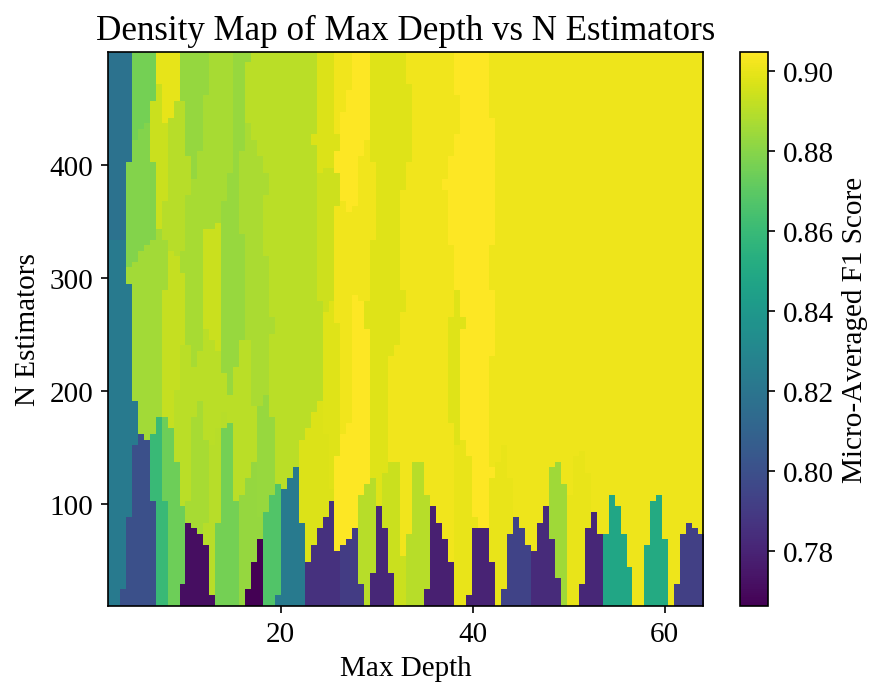

In [33]:
visualize_v2('max_depth', 'n_estimators', 'micro_avg_f1', rfc_res_df[rfc_res_df.final == False], method='nearest')


In [34]:
ensemble_res_df = pd.read_json("voting_ensemble_opt_1.json", lines=True)
ensemble_res_df

,params,accuracy,micro_avg_f1,macro_avg_f1,final
0,"{'C': 7777.024328035791, 'l1_ratio': 0.2380661...",0.832776,0.817518,0.817772,False
1,"{'C': 6090.425018570317, 'l1_ratio': 0.7749754...",0.806020,0.783582,0.780011,False
2,"{'C': 585.1258603082556, 'l1_ratio': 0.8563468...",0.849498,0.839857,0.839647,False
3,"{'C': 94.12869139692405, 'l1_ratio': 0.3586171...",0.896321,0.893470,0.894408,False
4,"{'C': 319.03763249528083, 'l1_ratio': 0.065954...",0.869565,0.863157,0.863435,False
...,...,...,...,...,...
146,"{'C': 7647.871113423045, 'l1_ratio': 0.9866283...",0.836120,0.821818,0.822147,False
147,"{'C': 4073.5716048028066, 'l1_ratio': 0.527505...",0.842809,0.829090,0.828873,False
148,"{'C': 9131.938426988254, 'l1_ratio': 0.2899096...",0.826087,0.811594,0.812611,False
149,"{'C': 7064.587671003788, 'l1_ratio': 0.1783874...",0.822742,0.805860,0.805891,False


In [35]:
ensemble_res_df.loc[ensemble_res_df.final == True, :].reset_index()['params'][0]

{'C': 2045.7891312130546,
 'l1_ratio': 0.049833394439413,
 'max_depth': 48.12718850106587,
 'n_estimators': 97.06033604146855,
 'penalty': 'elasticnet',
 'rfc_weight': 0.855137554079295}

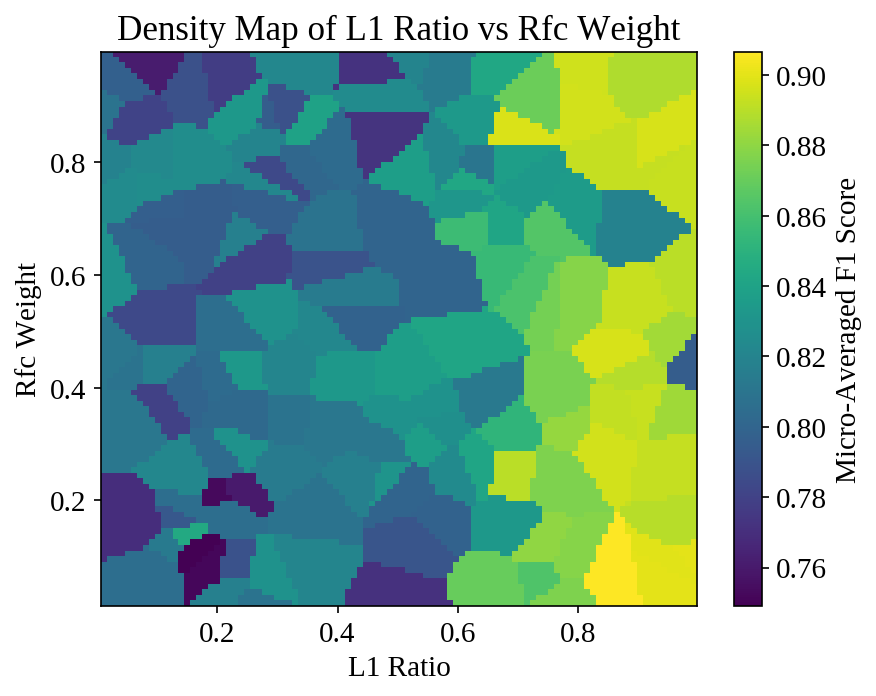

In [36]:
visualize_v2('l1_ratio', 'rfc_weight', 'micro_avg_f1', ensemble_res_df[ensemble_res_df.final == False], method='nearest')


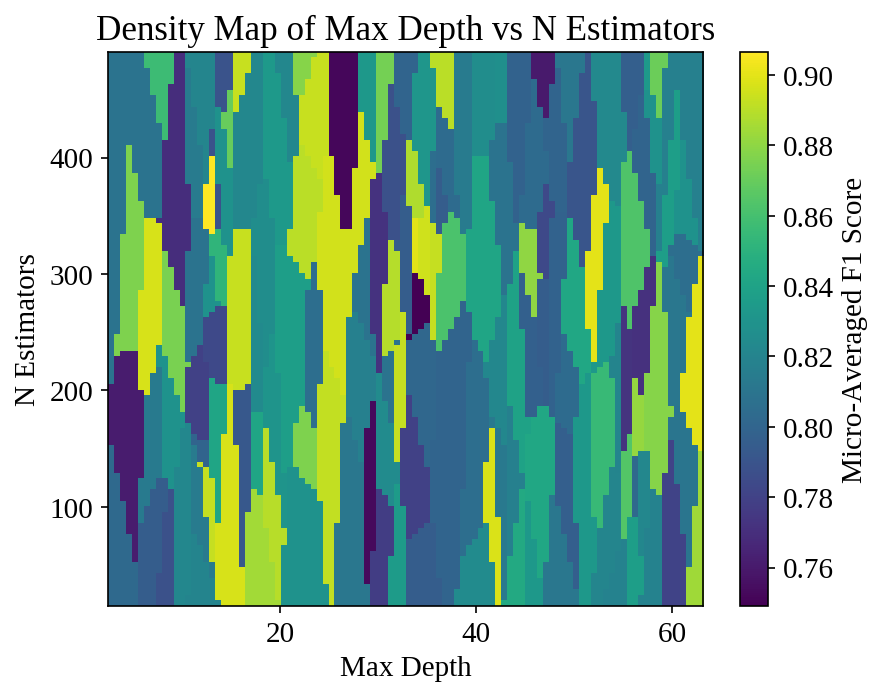

In [37]:
visualize_v2('max_depth', 'n_estimators', 'micro_avg_f1', ensemble_res_df[ensemble_res_df.final == False], method='nearest')


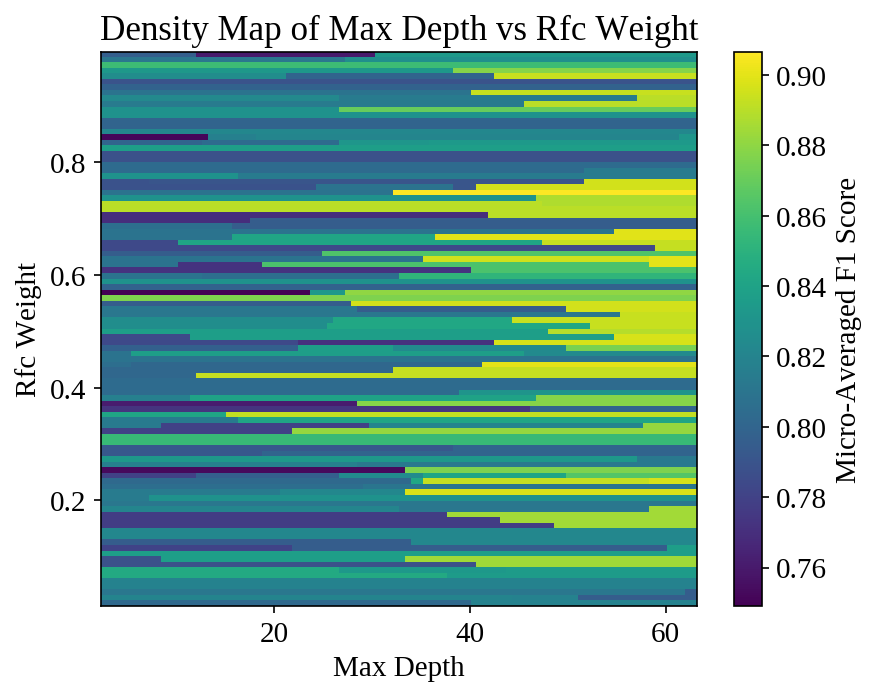

In [38]:
visualize_v2('max_depth', 'rfc_weight', 'micro_avg_f1', ensemble_res_df[ensemble_res_df.final == False], method='nearest')
